<a href="https://colab.research.google.com/github/noraisyahh/StaffRecords/blob/main/Python_Excel_Project_Staff_Records.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Recreating 2 Excel Visualisation in Python


In [ ]:
import pandas as pd
import numpy as np

mydf = pd.read_csv("C:/Users/DELL/Desktop/Backup/Downloads/Y2-S1/ANL252/TMA_Data.csv") #Importing CSV file into dataframe
mydf.head(10)

,ID,Staff,BirthYear,Gender,Marital,Citizenship,Minority,JoinDate,LeftDate,Unit,Salary,PerformanceScore,Survey,Satisfaction,Absence
0,1,Aairah Hastings,10/7/1986,F,Single,Citizen,Yes,4/2/2012,NaN,Manufacturing,46335,Meet,3.40,5,15
1,2,Aaminah Mcmillan,05/25/86,F,Married,Citizen,No,5/12/2014,NaN,Manufacturing,66825,Meet,4.60,3,20
2,3,Aamna Howell,04/20/85,F,Single,Citizen,No,9/29/2014,NaN,Manufacturing,60446,Meet,3.40,4,14
3,4,Aayan Ferrell,6/10/1984,M,Married,Citizen,No,1/5/2016,NaN,Admin,93046,Meet,4.10,4,20
4,5,Ace Potter,9/8/1989,F,Divorced,Citizen,No,7/11/2011,9/6/2020,Manufacturing,50825,Meet,5.00,4,2
5,6,Adaline Deacon,07/30/83,F,Divorced,Citizen,No,1/10/2011,5/14/2012,Manufacturing,58062,Meet,3.60,5,9
6,7,Addie Terrell,5/9/1965,F,Single,Citizen,No,7/5/2011,9/5/2016,Manufacturing,48413,Meet,3.98,4,1
7,8,Adeeb Rice,6/11/1970,M,Single,PR,No,5/14/2012,NaN,Sales,66808,Meet,3.00,5,17
8,9,Aleena Sierra,3/12/1973,F,Married,Citizen,No,6/10/2011,NaN,IT,66593,Meet,4.30,3,19
9,10,Alena Galvan,11/23/85,F,Single,Citizen,No,11/10/2014,NaN,Manufacturing,66738,Meet,4.53,5,5


In [ ]:
selectdata = mydf[["Unit", "Survey"]].dropna().round() #Removing rows that contains NULL values and rounding values in Unit and Survey columns
selectdata.groupby(["Unit","Survey"]) #To return a single aggregated value for each column group
sumtable = pd.crosstab(selectdata.Unit,selectdata.Survey) #To create a cross tabulation of the data

plotdata = pd.DataFrame(sumtable)
plotdata2 = plotdata.div(plotdata.sum(axis=1), axis=0)*100 #Converting the values into percentage
plotdata2.round(1) #Rounding off the percentage to 1 d.p.

Survey,2.0,3.0,4.0,5.0
Unit,,,,
Admin,0.0,0.0,42.9,57.1
C-Level,0.0,0.0,0.0,100.0
Engineering,10.0,10.0,50.0,30.0
IT,2.4,17.1,43.9,36.6
Manufacturing,3.6,13.6,48.5,34.3
Sales,4.5,18.2,59.1,18.2


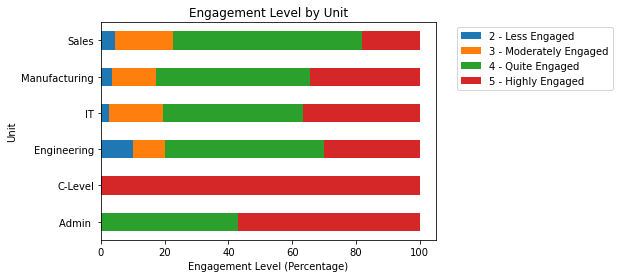

In [ ]:
import matplotlib.pyplot as plt

engagelvl = {"2 - Less Engaged": 2.0, "3 - Moderately Engaged": 3.0, "4 - Quite Engaged": 4.0, "5 - Highly Engaged": 5.0} #Storing the legend value into dictionary

plotdata2.plot(kind="barh", stacked=True) #Plotting the dataframe into horizontal stacked bar chart
plt.legend(engagelvl, bbox_to_anchor=(1.05,1)) #Adjusting the legends placement
plt.title("Engagement Level by Unit") #Naming plot title
plt.xlabel("Engagement Level (Percentage)") #Naming x-axis
plt.ylabel("Unit") #Naming y-axis
plt.show()

# Question (b) - Table & Chart 2

In [ ]:
selectdata2 = mydf[["PerformanceScore", "Absence"]].dropna()  #Removing rows containing NULL values in PerformanceScore and Absence
sumtable2 = pd.crosstab(selectdata2.PerformanceScore,selectdata2.Absence).transpose() #Computing cross tabulation and swapping the index and column
plotdata3 = pd.DataFrame(sumtable2) #Converting the data into dataframe
plotdata3

PerformanceScore,Exceed,Meet,PIP,To Improve
Absence,,,,
1,4,7,0,0
2,0,14,0,1
3,1,11,0,1
4,2,16,0,2
5,1,7,1,0
6,1,10,1,2
7,1,14,0,0
8,0,9,0,0
9,2,10,0,0


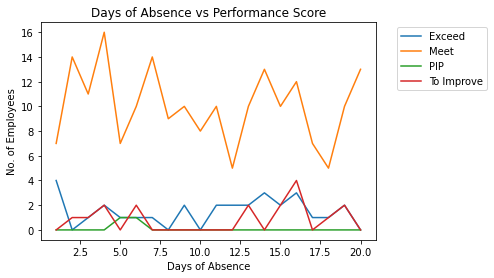

In [ ]:
    import matplotlib.pyplot as plt

    plotdata3.plot(kind="line") #Plotting the dataframe into line graph
    plt.legend(bbox_to_anchor=(1.05,1)) #Adjusting the legend placement
    plt.title("Days of Absence vs Performance Score") #Naming plot title
    plt.xlabel("Days of Absence") #Naming x-axis
    plt.ylabel("No. of Employees") #Naming y-axis
    plt.show()

# Question (c)

In [ ]:
import pandas as pd
import numpy as np

mydf = pd.read_csv("C:/Users/DELL/Desktop/Backup/Downloads/Y2-S1/ANL252/TMA_Data.csv")
data = mydf[["Staff","JoinDate", "LeftDate"]]
staff_length = pd.DataFrame(data)
staff_length.fillna(value=pd.to_datetime("5/1/2022"), inplace=True) #Filling in missing value with 5/1/2022
staff_length["JoinDate"] = pd.to_datetime(staff_length["JoinDate"]).dt.date #Converting JoinDate from datetime to date
staff_length["LeftDate"] = pd.to_datetime(staff_length["LeftDate"]).dt.date #Converting LeftDate from datetime to date
staff_length["DaysOfService"] = staff_length["LeftDate"] - staff_length["JoinDate"] #Length of service in days
staff_length["YearOfService"] = staff_length["DaysOfService"] / np.timedelta64(1, "Y") #Expressing length of service to years
staff_length["YearOfService"] = staff_length["YearOfService"].round(1) #Rounding years of service to 1 d.p
staff_length.head(10)

,Staff,JoinDate,LeftDate,DaysOfService,YearOfService
0,Aairah Hastings,2012-04-02,2022-05-01,3681 days,10.1
1,Aaminah Mcmillan,2014-05-12,2022-05-01,2911 days,8.0
2,Aamna Howell,2014-09-29,2022-05-01,2771 days,7.6
3,Aayan Ferrell,2016-01-05,2022-05-01,2308 days,6.3
4,Ace Potter,2011-07-11,2020-09-06,3345 days,9.2
5,Adaline Deacon,2011-01-10,2012-05-14,490 days,1.3
6,Addie Terrell,2011-07-05,2016-09-05,1889 days,5.2
7,Adeeb Rice,2012-05-14,2022-05-01,3639 days,10.0
8,Aleena Sierra,2011-06-10,2022-05-01,3978 days,10.9
9,Alena Galvan,2014-11-10,2022-05-01,2729 days,7.5


In [ ]:
staff_length.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype          
---  ------         --------------  -----          
 0   Staff          250 non-null    object         
 1   JoinDate       250 non-null    object         
 2   LeftDate       250 non-null    object         
 3   DaysOfService  250 non-null    timedelta64[ns]
 4   YearOfService  250 non-null    float64        
dtypes: float64(1), object(3), timedelta64[ns](1)
memory usage: 9.9+ KB


In [ ]:
min_year = staff_length["YearOfService"].min() #Finding minimum length of service
print(f"The minimum length of service is {min_year} years.")
max_year = staff_length["YearOfService"].max() #Finding maximum length of service
print(f"The maximum length of service is {max_year} years.")
rounded_mean = round(staff_length["YearOfService"].mean(),1) #Finding average length of service and rounding it to 1 d.p
print(f"The average length of service is {rounded_mean} years.")

The minimum length of service is 0.1 years.
The maximum length of service is 16.3 years.
The average length of service is 6.8 years.
